# Forward modeling tutorial using mosaic images
## Extract BeamCutout

Here I will show you how to extract BeamCutouts. Saving these (fits) files before modeling will make entire process quicker. The BeamCutouts contain the orient information which is nessecary for better fitting models. Here's what Gabe says about this from his grizli notebooks:

>To interact more closely with an individual object, its information can be extracted from the full exposure with the BeamCutout class. This object will contain the high-level GrismDisperser object useful for generating the model spectra and it will also have tools for analyzing and fitting the observed spectra.

>It also makes detailed cutouts of the parent direct and grism images preserving the native WCS information.

In [6]:
from grizli import model
from grizli import multifit
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from shutil import copy
from astropy.table import Table
from astropy import wcs
from astropy.io import fits
from glob import glob
import os

## Seaborn is used to make plots look nicer. 
## If you don't have it, you can comment it out and it won't affect the rest of the code
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Set files and target

For this example I'll be using one of my quiescent galaxys from GOODS north.

In [8]:
Grism_flts = glob('/Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/*GrismFLT.fits')

grp = multifit.GroupFLT(grism_files = Grism_flts, verbose=False)

Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFLT.fits!
Load /Volumes/Vince_CLEAR/Da

## Use Grizli to extract beam

First you'll need to create a GrismFLT object. 

Next run blot_catalog to create the catalog of objects in the field. 
Another routine (photutils_detection) is used if you're not using mosiac images and segmentation maps, 
but since we have them you should do it this way.

In [10]:
beams = grp.get_beams(39170)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


In [40]:
pa = -1
for BEAM in beams:
    if pa != BEAM.get_dispersion_PA():
        print('Instrument : {0}, ORIENT : {1}'.format(BEAM.grism.filter,BEAM.get_dispersion_PA()))
        pa = BEAM.get_dispersion_PA()


Instrument : G141, ORIENT : 345.0
Instrument : G102, ORIENT : 78.0
Instrument : G102, ORIENT : 48.0
Instrument : G102, ORIENT : 98.0


In [39]:
# save out G102 - 345
BEAM = beams[16]
BEAM.write_fits(root='98', clobber=True)
fits.setval('98_39170.g102.A.fits', 'EXPTIME', ext=0,
        value=fits.open('98_39170.g102.A.fits')[1].header['EXPTIME'])   

# save out G102 - 78
BEAM = beams[4]
BEAM.write_fits(root='78', clobber=True)
fits.setval('78_39170.g102.A.fits', 'EXPTIME', ext=0,
        value=fits.open('78_39170.g102.A.fits')[1].header['EXPTIME'])   

# save out G102 - 48
BEAM = beams[8]
BEAM.write_fits(root='48', clobber=True)
fits.setval('48_39170.g102.A.fits', 'EXPTIME', ext=0,
        value=fits.open('48_39170.g102.A.fits')[1].header['EXPTIME'])   

# save out G141 - 345
BEAM = beams[0]
BEAM.write_fits(root='345', clobber=True)
fits.setval('345_39170.g141.A.fits', 'EXPTIME', ext=0,
        value=fits.open('345_39170.g141.A.fits')[1].header['EXPTIME'])   


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


Text(0.5,1,'345_39170.g141.A.fits')

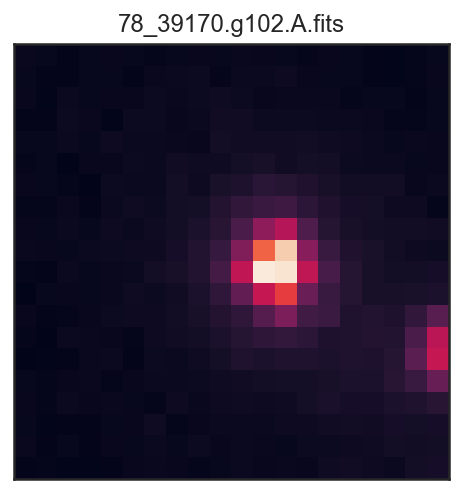

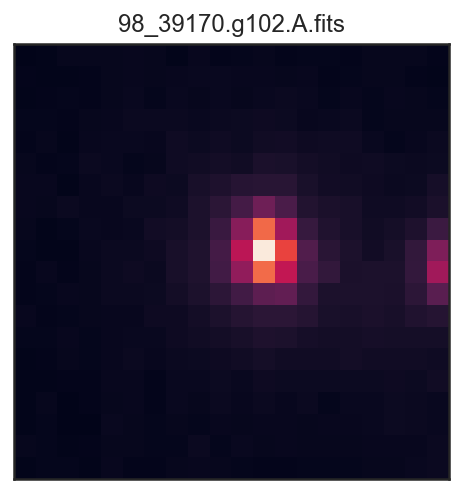

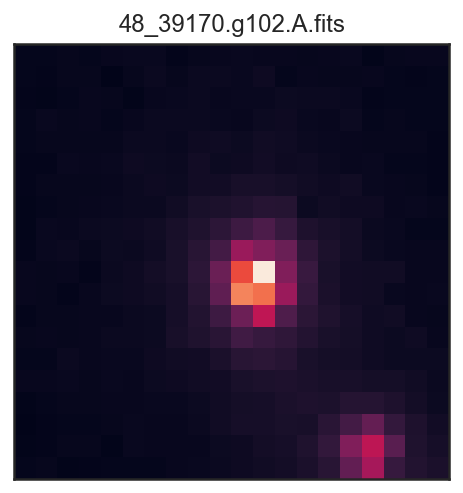

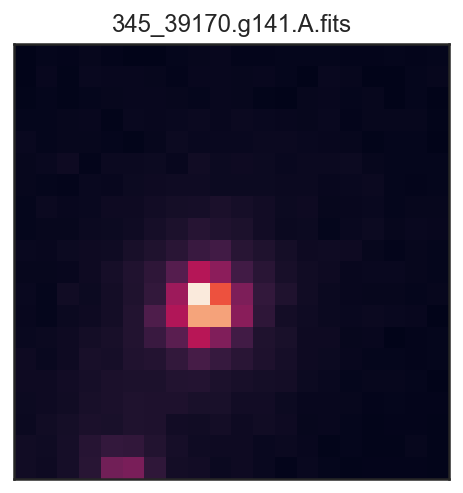

In [46]:
## G102 cutouts
for i in glob('*.g102*'):
    g102_beam = model.BeamCutout(fits_file=i)
    plt.figure()
    plt.imshow(g102_beam.beam.direct)
    plt.xticks([])
    plt.yticks([])
    plt.title(i)


## G141 cutout
g141_beam = model.BeamCutout(fits_file='345_39170.g141.A.fits')
plt.figure()
plt.imshow(g141_beam.beam.direct)
plt.xticks([])
plt.yticks([])
plt.title('345_39170.g141.A.fits')

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


Text(0.5,1,'345_39170.g141.A.fits')

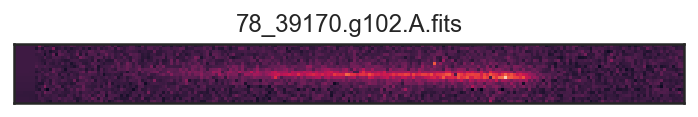

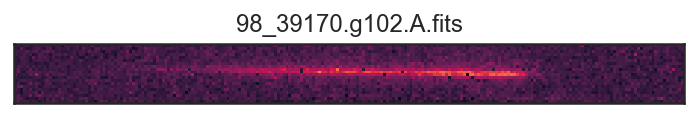

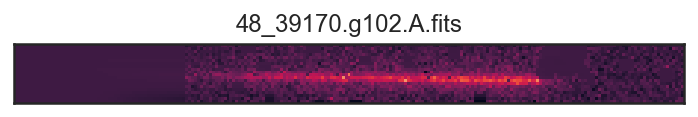

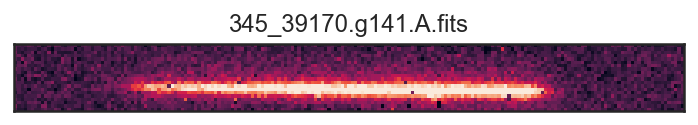

In [62]:
## G102 cutouts
for i in glob('*.g102*'):
    g102_beam = model.BeamCutout(fits_file=i)
    plt.figure()
    plt.imshow(g102_beam.grism.data['SCI']- g102_beam.contam, vmin = -0.1, vmax=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title(i)


## G141 cutout
g141_beam = model.BeamCutout(fits_file='345_39170.g141.A.fits')
plt.figure()
plt.imshow(g141_beam.grism.data['SCI']- g141_beam.contam, vmin = -0.1, vmax=0.5)
plt.xticks([])
plt.yticks([])
plt.title('345_39170.g141.A.fits')